In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
df = pd.merge(df,movie_titles,on='item_id')
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [5]:
#Analyse them
import seaborn as sns
import matplotlib as plt
%matplotlib inline

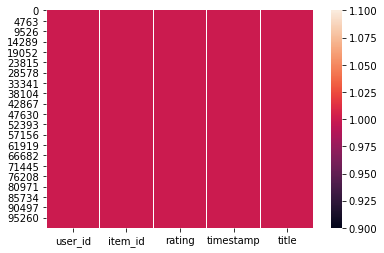

In [6]:
#check for missing data
sns.heatmap(df.notna())

In [9]:
ratingMovie = df.groupby('title')['rating'].mean().sort_values(ascending =False)
movieInfo = pd.DataFrame(ratingMovie)
movieInfo

,rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0
...,...
Touki Bouki (Journey of the Hyena) (1973),1.0
JLG/JLG - autoportrait de décembre (1994),1.0
Daens (1992),1.0


In [10]:
ratingCountMovie = df.groupby('title')['rating'].count().sort_values(ascending =False)
movieInfo['count']= ratingCountMovie
movieInfo

,rating,count
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1
...,...,...
Touki Bouki (Journey of the Hyena) (1973),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Daens (1992),1.0,1


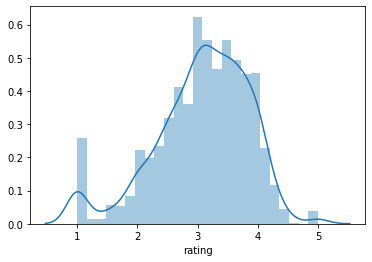

In [12]:
sns.distplot(movieInfo['rating'])

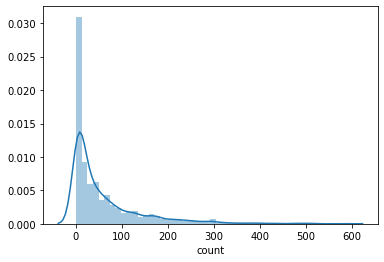

In [13]:
sns.distplot(movieInfo['count'])

In [18]:
#Table for each user vs movies
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MOVIE RECOMMENDER BELOW

In [19]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head(10)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
#USE CORR WITH to find correlation of one column with other
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [44]:
recommForStarWars = similar_to_starwars.dropna().sort_values(ascending = False)
recommForStarWars = pd.DataFrame(recommForStarWars)
recommForStarWars

,0
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Full Speed (1996),1.0
Golden Earrings (1947),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
...,...
Theodore Rex (1995),-1.0
I Like It Like That (1994),-1.0
Two Deaths (1995),-1.0


In [45]:
recommForStarWars =  pd.merge(recommForStarWars,movieInfo,on='title')
recommForStarWars

,0,rating,count
title,,,
Hollow Reed (1996),1.0,2.333333,6
Stripes (1981),1.0,3.800000,5
Full Speed (1996),1.0,3.125000,8
Golden Earrings (1947),1.0,4.000000,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,2.600000,5
...,...,...,...
Theodore Rex (1995),-1.0,1.400000,5
I Like It Like That (1994),-1.0,2.333333,3
Two Deaths (1995),-1.0,2.250000,4


In [48]:
recommForStarWars = recommForStarWars[recommForStarWars['count'] >100]
recommForStarWars

,0,rating,count
title,,,
Star Wars (1977),1.000000,4.359589,584
"Empire Strikes Back, The (1980)",0.748353,4.206522,368
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
...,...,...,...
"Edge, The (1997)",-0.127167,3.539823,113
As Good As It Gets (1997),-0.130466,4.196429,112
Crash (1996),-0.148507,2.546875,128


In [49]:
# for liar liar

In [50]:
recommForLiarLiar = similar_to_liarliar.dropna().sort_values(ascending = False)
recommForLiarLiar = pd.DataFrame(recommForLiarLiar)
recommForLiarLiar

,0
title,
For Ever Mozart (1996),1.0
Mina Tannenbaum (1994),1.0
Johnny 100 Pesos (1993),1.0
Of Human Bondage (1934),1.0
Legal Deceit (1997),1.0
...,...
"Big Squeeze, The (1996)",-1.0
"Quiet Room, The (1996)",-1.0
Lamerica (1994),-1.0


In [51]:
recommForLiarLiar =  pd.merge(recommForLiarLiar,movieInfo,on='title')
recommForLiarLiar

,0,rating,count
title,,,
For Ever Mozart (1996),1.0,2.000000,3
Mina Tannenbaum (1994),1.0,3.666667,6
Johnny 100 Pesos (1993),1.0,1.500000,2
Of Human Bondage (1934),1.0,3.200000,5
Legal Deceit (1997),1.0,3.400000,5
...,...,...,...
"Big Squeeze, The (1996)",-1.0,2.250000,4
"Quiet Room, The (1996)",-1.0,3.666667,3
Lamerica (1994),-1.0,3.750000,4


In [52]:
recommForLiarLiar = recommForLiarLiar[recommForLiarLiar['count'] >100]
recommForLiarLiar

,0,rating,count
title,,,
Liar Liar (1997),1.000000,3.156701,485
Batman Forever (1995),0.516968,2.666667,114
"Mask, The (1994)",0.484650,3.193798,129
Down Periscope (1996),0.472681,2.702970,101
Con Air (1997),0.469828,3.459854,137
...,...,...,...
Hoop Dreams (1994),-0.184503,4.094017,117
Ed Wood (1994),-0.199481,3.601504,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,4.252577,194
